# Project 1 - Data Exploration - Shark Attack

The purpuse of this file was to start the data exploration, creation of funtions needed and visualizations for the final file creation.    

   ## 1 Import libraries

In [216]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import re

In [217]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

   ## 2 Hypothesis of this project

### Hypothesis --> Understand if Australia is the riskiest country to go surfing specially in the afternoon
   ##### A) Is there a trend YoY?
   ##### B) Which are the top 5 riskiest countries?
   ##### C) Is this risk fatal?
   ##### D) Is there any specific riskier Month?

   ## 3 Data Cleaning Function


In [218]:
def data_clean(df):
    df=pd.read_csv(df, engine= 'python')
    #Remove Columns Unnamed 22 and 23 since they don't have data at all
    df.drop(['Unnamed: 22','Unnamed: 23'], axis=1, inplace=True)
    #Capitalizing Counties since the data was all in upper
    df.Country = df.Country.str.capitalize()
    #Removing all the raws that contain too many NAN values
    df.dropna(thresh=14, inplace=True)
    #Rename Columns with spaces or too much info
    df.rename(columns={"Sex ":"Sex", "Species ":"Species","Fatal (Y/N)":"Fatal"}, inplace=True)
    #Creating a new column for last part of url -- objective- replace current pdf column as it's not complete
    df['Url2'] = df['href'].str.split('/').str[-1]
    #Creating a Last Name column from the url
    df['Last_Name'] = df['Url2'].str.extract('([a-zA-Z]{4,})', expand=True)
    #Creating First Name Column
    df['First_Name'] = df['Name'].str.split(' ').str[0]
    #Creating a 2nd date column from new url column
    df['Date2'] = df['Url2'].str.extract('(\d{4}.\d{2}.\d{2})', expand=True)
    #Creating columns for Day, Month and Year to check
    df['Day'] = df['Date'].str.split('-').str[0]
    df['Month'] = df['Date'].str.split('-').str[1]
    #To consolidate mainly to Jan-Feb type of month strings (many inconsitencies before)
    df['Month'] = df['Month'].str.extract('([a-zA-Z]{3,})', expand=True)
    df['Year2'] = df['Date2'].str.extract('([0-9]{4})', expand=True)
    #Creating Hour column
    df['Hour'] = df['Time'].str.extract('([0-9]{2})', expand=True)
    #Splitting Inv.Source into 2 columns>
    df['Investigator'] = df['Investigator or Source'].str.split(',').str[0]
    df['Source'] = df['Investigator or Source'].str.split(',').str[1]
    return df

In [219]:
df = data_clean('C:/Users/maria/Desktop/Project_1_Pandas_Mariano/Data/attacks.csv')

   ## 4 Fucntions

In [220]:
#Year_unique for determination of final year
def year_unique (row):
    if str(row['Year']) != 'nan' and str(row['Year2']) != 'nan':
        if str(row['Year']) == str(row['Year2']):
            return int(row['Year'])
        elif len(str(row['Year'])) <= 5:
            return int(row['Year'])
        elif len(str(row['Year2'])) <= 5:
            return int(row['Year2'])
        else:
            return 0
    elif str(row['Year']) == 'nan' and str(row['Year2']) != 'nan':
        if len(str(row['Year2'])) <= 5:
            return int(row['Year2'])
        else:
            return 0
    else:
        return 0
df['Year_Unique'] = df.apply(lambda row: year_unique(row), axis=1)
#Creating Func for time range to determine moment of the day
def time_range (row):
    if str(row['Hour']) != 'nan':
        if int(row['Hour']) > 6 and int(row['Hour']) < 14:
            return 'Morning'
        elif int(row['Hour']) >= 14 and int(row['Hour']) < 22:
            return 'Afternoon'
        else:
            return 'Evening'
    #There were many Uknown in the past since many rows in Time were strings with words contaning time-range, by adding this
    #we avoid having situations of unknowns but still is an option in case there is any
    elif str(row['Time']).lower().find('afternoon'):
        return 'Afternoon'
    elif str(row['Time']).lower().find('morning'):
        return 'Morning'
    elif str(row['Time']).lower().find('evening'):
        return 'Evening'
    else:
        return 'Unknown'
#Creating Time Range column applying the func
df['Time_Range'] = df.apply(lambda row: time_range(row), axis=1)
#Creating Category gorup func to agroupate activities with less granularity
def category (row):
    if str(row['Activity']) != 'nan':
        if str(row['Activity']) in ['Surfing','Standing']:
            return 'Surfing'
        elif str(row['Activity']) in ['Swimming','Bathing']:
            return 'Swimming'
        elif str(row['Activity']) in ['Fishing','Wading']:
            return 'Fishing'
        elif str(row['Activity']) in ['Diving','Snorkeling','Spearfishing','Scuba diving']:
            return 'Diving'
        else:
            return 'Other Activity'
    else:
        return 'Unknown'
#Creating Activity Category group column
df['Activity_Category'] = df.apply(lambda row: category(row), axis=1)
#Creating TimeRange-Act.Category gorup func to join both categories:
def TimeR_ActCat (row):
    if str(row['Time_Range']) != 'nan' and str(row['Activity_Category']) != 'nan':
        return str(row['Time_Range']) + str(row['Activity_Category'])
    else:
        return 'Unknown'
#Creating TimeRange-Act.Category group column
df['TimeRange-ActCategory'] = df.apply(lambda row: TimeR_ActCat(row), axis=1)

   ## 5 Sub-Dataframes

In [221]:
#Creating a sub-df for analysis
sub_df = df[['Year_Unique', 'Date2', 'Day', 'Month', 'Hour', 'Time_Range',
          'Country', 'Area', 'Type', 'Injury', 'Fatal', 'Species',
            'First_Name','Last_Name','Sex', 'Age','Activity_Category','TimeRange-ActCategory']]
#Creating Second Subdata set filtered with Year >2000
sub_df2= sub_df[sub_df["Year_Unique"] >2000]
#Modifying value manually
sub_df2.loc[463, "Year_Unique"] = 2014
sub_df2 = sub_df2.sort_values(by="Year_Unique", ascending=False)
#Creating a top 5 Countries with most shark attacks from 2000 onwards (sub_df2)
top_5_df = sub_df2.query("Country in ('Usa','Australia','South africa','Brazil','Bahamas')")

In [238]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Url2', 'Last_Name',
       'First_Name', 'Date2', 'Day', 'Month', 'Year2', 'Hour', 'Investigator',
       'Source', 'Year_Unique', 'Time_Range', 'Activity_Category',
       'TimeRange-ActCategory'],
      dtype='object')

In [228]:
df.shape

(6302, 36)

In [347]:
sub_df.shape

(6302, 18)

In [230]:
sub_df2.shape

(1978, 18)

In [231]:
top_5_df.shape

(1581, 18)

   ## 6 Visualizations

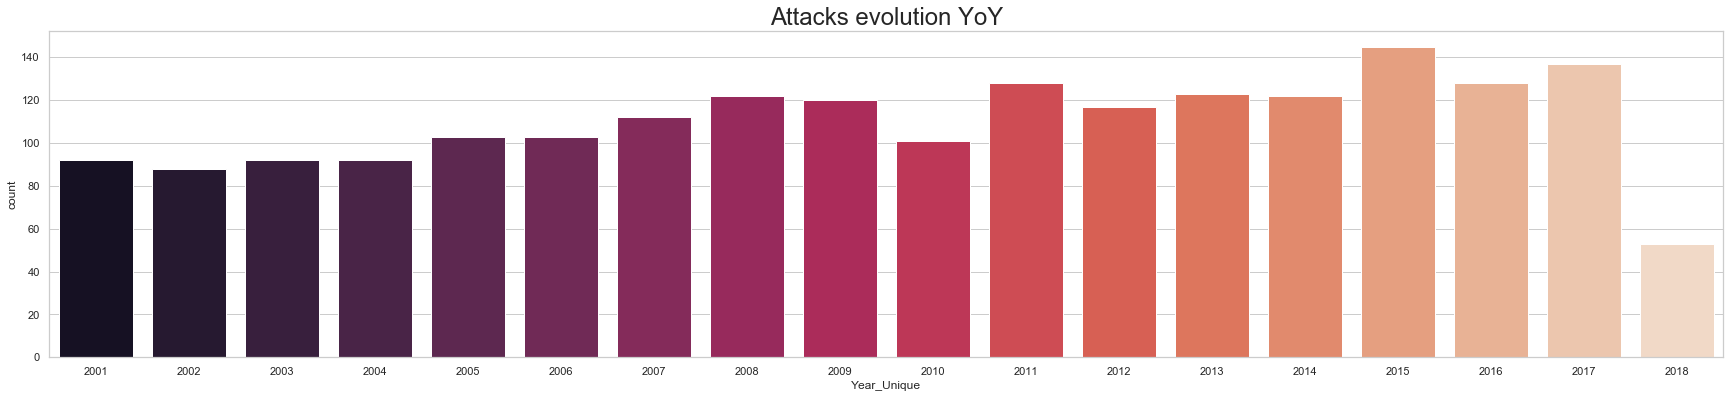

In [391]:
def attacks_yoy (sub_df2):
    attacks_yoy_fig = sns.countplot(x=sub_df2.Year_Unique, palette="rocket")
    sns.set_context("poster")
    plt.title("Attacks evolution YoY")
    sns.set(rc={"figure.figsize": (30 ,6)})
    sns.set_style("whitegrid")
    attacks_yoy_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/attacks_yoy_fig.jpg", dpi=500)
attacks_yoy(sub_df2)

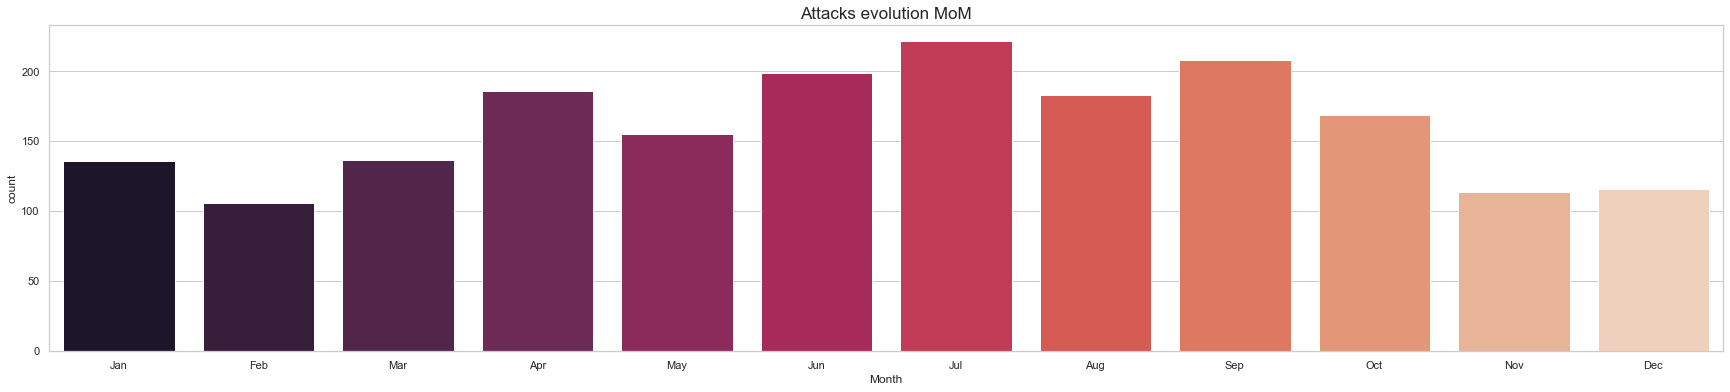

In [392]:
def attacks_mom (sub_df2):
    attacks_mom_fig = sns.countplot(x=sub_df2.Month, palette="rocket", order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    sns.set_context("poster")
    plt.title("Attacks evolution MoM", size=17)
    sns.set(rc={"figure.figsize": (30 ,6)})
    sns.set_style("whitegrid")
    attacks_mom_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/attacks_mom_fig.jpg", dpi=500)

attacks_mom (sub_df2)

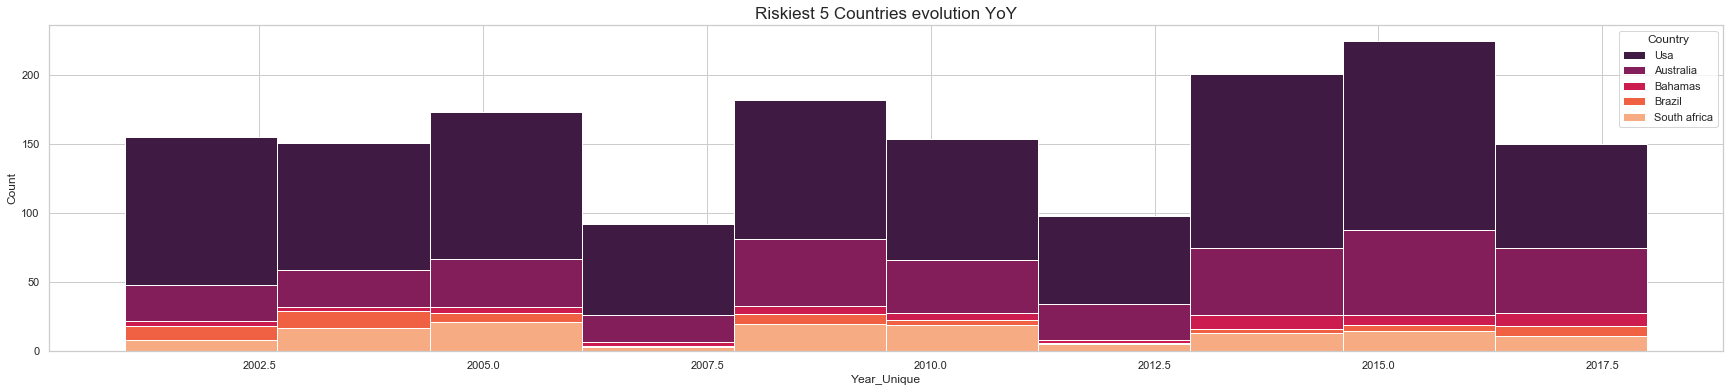

In [393]:
def top_5_yoy (top_5_df):
    top_5_yoy_fig = sns.histplot(data=top_5_df, x= "Year_Unique", hue="Country", multiple="stack", palette="rocket", bins=10, alpha=1)
    plt.title("Riskiest 5 Countries evolution YoY", size=17)
    sns.set_style("whitegrid")
    top_5_yoy_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/top_5_yoy_fig.jpg", dpi=500)

top_5_yoy (top_5_df)

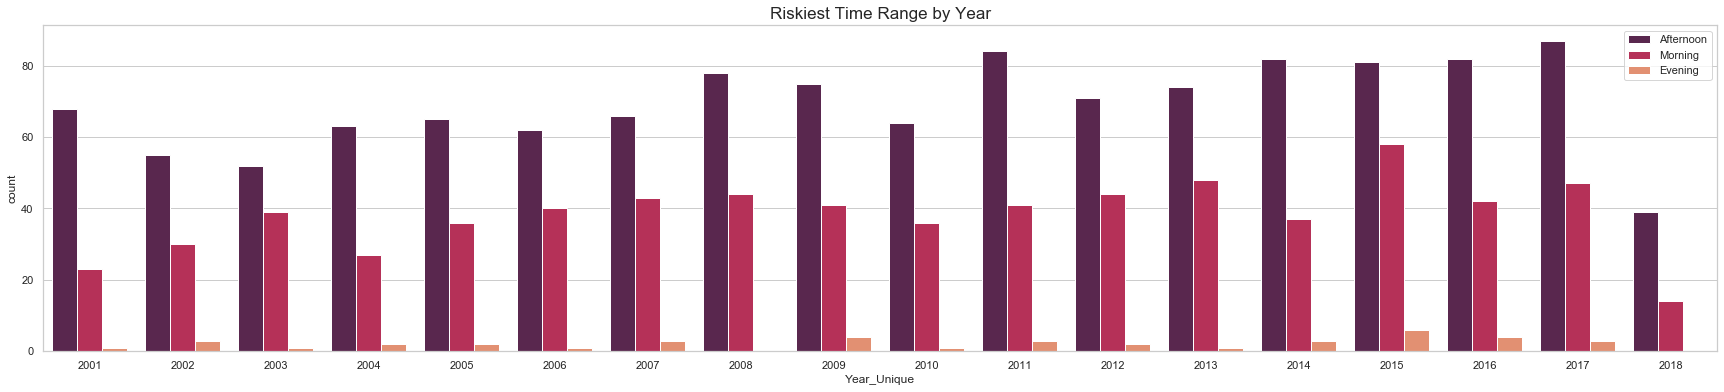

In [394]:
def risk_time_yoy (sub_df2):
    risk_time_yoy_fig = sns.countplot(x=sub_df2["Year_Unique"], hue=sub_df2["Time_Range"], palette="rocket")
    plt.legend(labels = ['Afternoon', 'Morning', 'Evening'], loc='upper right')
    plt.title("Riskiest Time Range by Year", size=17)
    sns.set_style("whitegrid")
    risk_time_yoy_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/risk_time_yoy_fig.jpg", dpi=500)

risk_time_yoy (sub_df2)

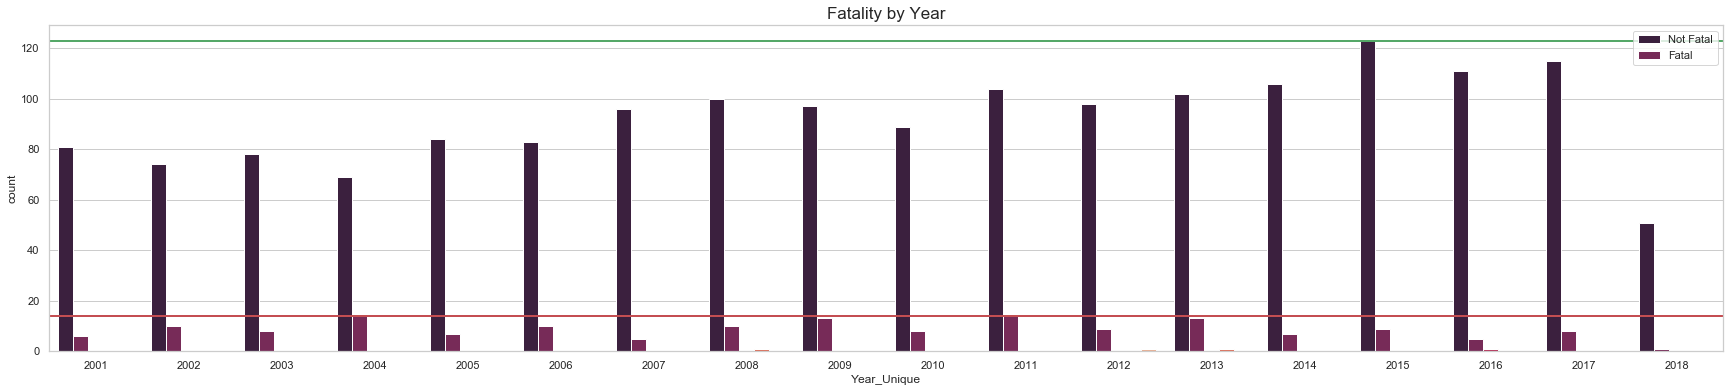

In [395]:
def fatality_yoy (sub_df2):
    fatality_yoy_fig = sns.countplot(x=sub_df2["Year_Unique"], hue=sub_df2["Fatal"], palette="rocket")
    plt.legend(labels = ['Not Fatal', 'Fatal'], loc='upper right')
    plt.title("Fatality by Year", size=17)
    plt.axhline(sub_df2.groupby('Year_Unique')['Fatal'].value_counts().unstack().fillna(0).loc[[2011]]['Y'].max(), c="r", linewidth=2, label="Max");
    plt.axhline(sub_df2.groupby('Year_Unique')['Fatal'].value_counts().unstack().fillna(0).loc[[2015]]['N'].max(), c="g", linewidth=2, label="Max");
    sns.set_style("whitegrid")
    fatality_yoy_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/fatality_yoy_fig.jpg", dpi=500)

fatality_yoy (sub_df2)

In [321]:
sub_df2.groupby('Fatal')['Year_Unique'].value_counts(normalize = True).unstack().fillna(0).loc[['Y','N']]

Year_Unique,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Fatal,,,,,,,,,,,,,,,,,,
Y,0.038217,0.063694,0.050955,0.089172,0.044586,0.063694,0.031847,0.063694,0.082803,0.050955,0.089172,0.057325,0.082803,0.044586,0.057325,0.031847,0.050955,0.006369
N,0.048766,0.044551,0.046960,0.041541,0.050572,0.049970,0.057797,0.060205,0.058399,0.053582,0.062613,0.059001,0.061409,0.063817,0.074052,0.066827,0.069235,0.030704


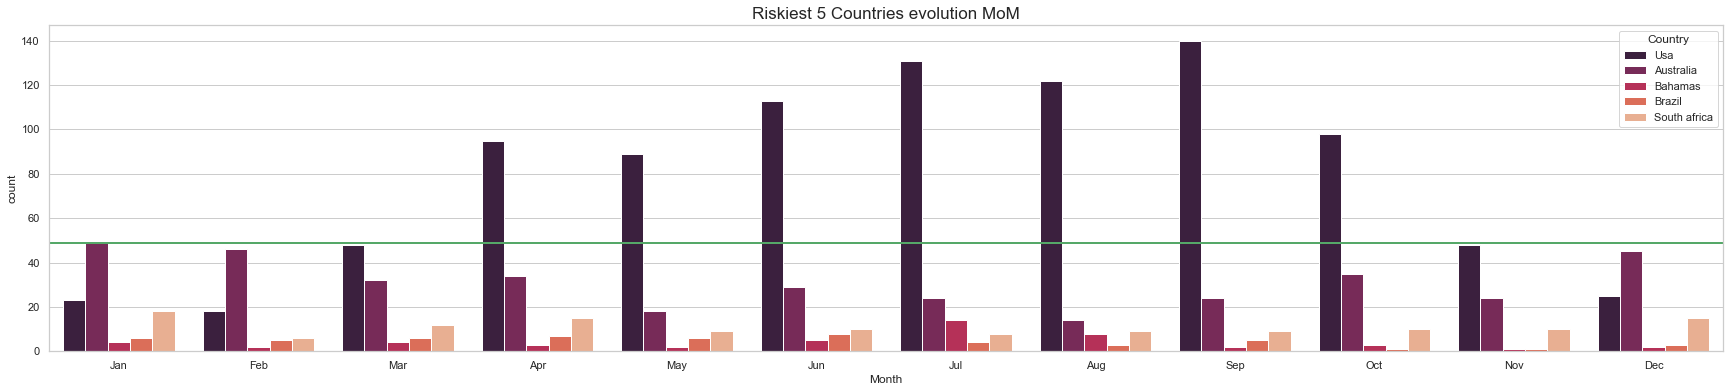

In [396]:
def top_5_mom (top_5_df):
    top_5_mom_fig = sns.countplot(x=top_5_df["Month"], hue=top_5_df["Country"], palette="rocket", 
                  order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.axhline(top_5_df.groupby('Country')['Month'].value_counts().unstack().fillna(0).loc[['Australia']]['Jan'].max(), c="g", linewidth=2, label="Max");
    plt.title("Riskiest 5 Countries evolution MoM", size=17)
    sns.set_style("whitegrid")
    top_5_mom_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/top_5_mom_fig.jpg", dpi=500)

top_5_mom (top_5_df)

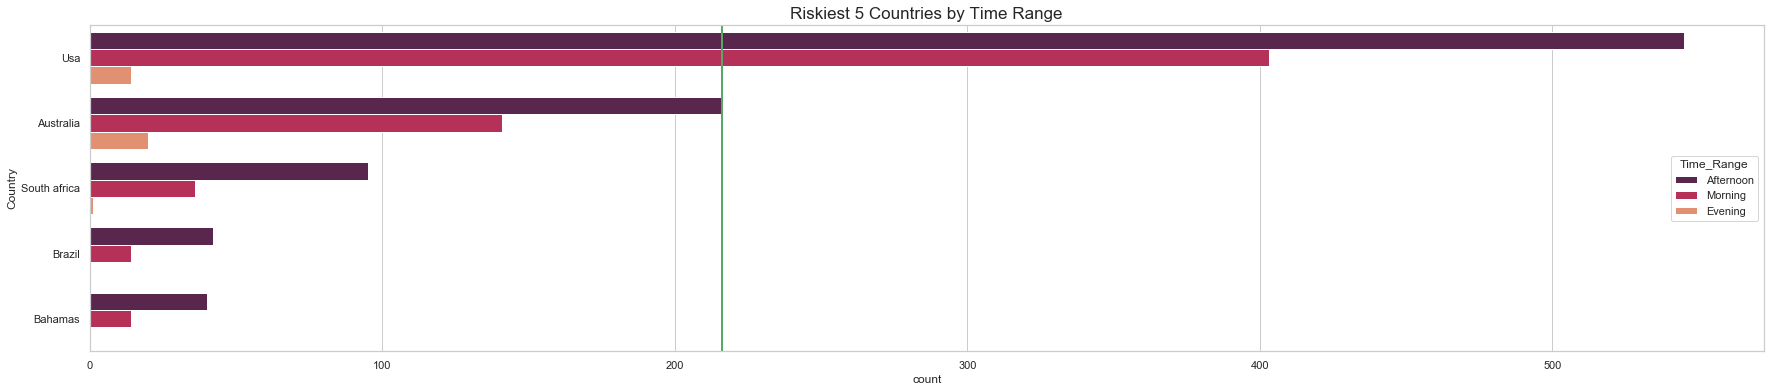

In [397]:
def top_5_time_range (sub_df2):
    top_5_time_range_fig = sns.countplot(y="Country", hue="Time_Range", data=sub_df2, palette="rocket",
                  order=sub_df2.Country.value_counts().iloc[:5].index)
    plt.title("Riskiest 5 Countries by Time Range", size=17)
    plt.axvline(sub_df2.groupby('Country')['Time_Range'].value_counts().unstack().fillna(0).loc[['Australia']]['Afternoon'].max(), c="g", linewidth=2, label="Max");
    sns.set_style("whitegrid")
    top_5_time_range_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/top_5_time_range_fig.jpg", dpi=500)

top_5_time_range (sub_df2)

In [319]:
sub_df2.groupby('Year_Unique')['Fatal'].value_counts().unstack().fillna(0).loc[[2015]]['N'].max()

123.0

In [92]:
#This was another way using loc instad of another DF but it was better making ahother DF for top 5 countries
#sub_df2.groupby('Country')['Time_Range'].value_counts(normalize = True).unstack().fillna(0).loc[['Usa','Australia','South africa','Brazil','Bahamas']].plot(kind="bar", title="Deadliest Time")
#plt.xticks(rotation=0.5);

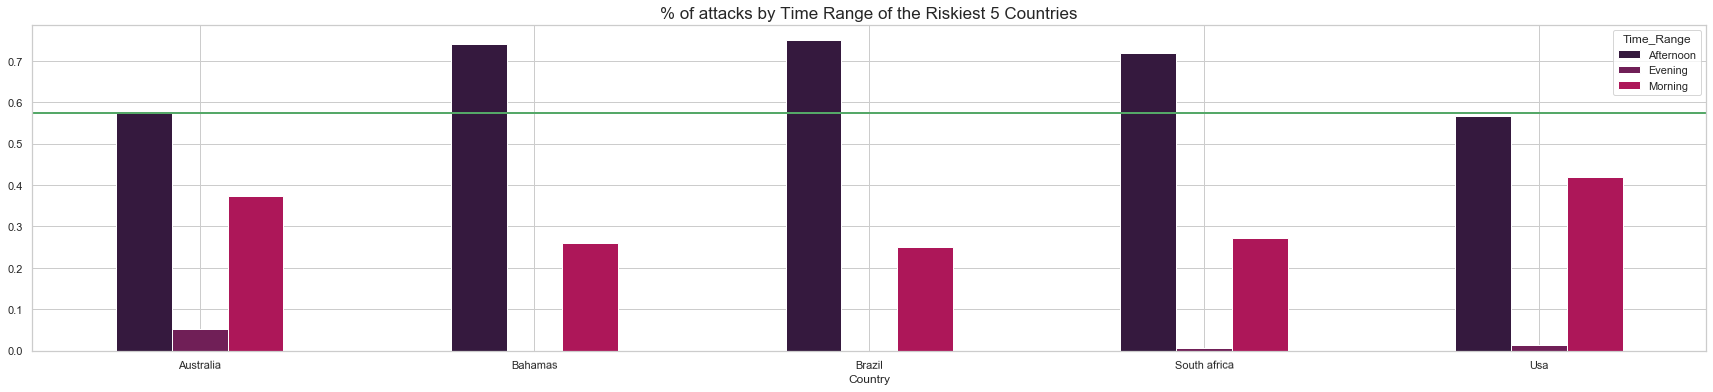

In [399]:
def top_5_time_range_por (sub_df2):
    top_5_time_range_por_fig = top_5_df.groupby('Country')['Time_Range'].value_counts(normalize = True).unstack().fillna(0).plot(kind="bar", title="Deadliest Time")
    sns.set_palette("rocket")
    plt.axhline(top_5_df.groupby('Country')['Time_Range'].value_counts(normalize = True).unstack().fillna(0).loc[['Australia']]['Afternoon'].max(), c="g", linewidth=2, label="Max");
    plt.title("% of attacks by Time Range of the Riskiest 5 Countries", size=17)
    plt.xticks(rotation=0.5)
    top_5_time_range_por_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/top_5_time_range_por_fig.jpg", dpi=500)

top_5_time_range_por(top_5_df)

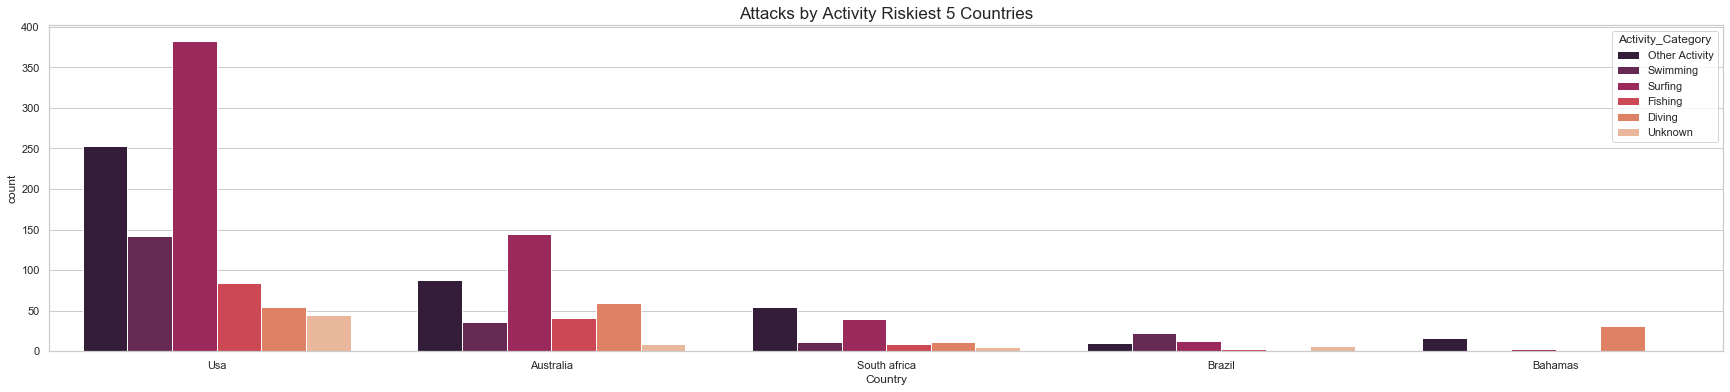

In [400]:
def top_5_activity (top_5_df):
    top_5_activity_fig = sns.countplot(x="Country", hue="Activity_Category", data=top_5_df, palette="rocket",
                  order=top_5_df.Country.value_counts().index)
    plt.title("Attacks by Activity Riskiest 5 Countries", size=17)
    top_5_activity_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/top_5_activity_fig.jpg", dpi=500)

top_5_activity (top_5_df)

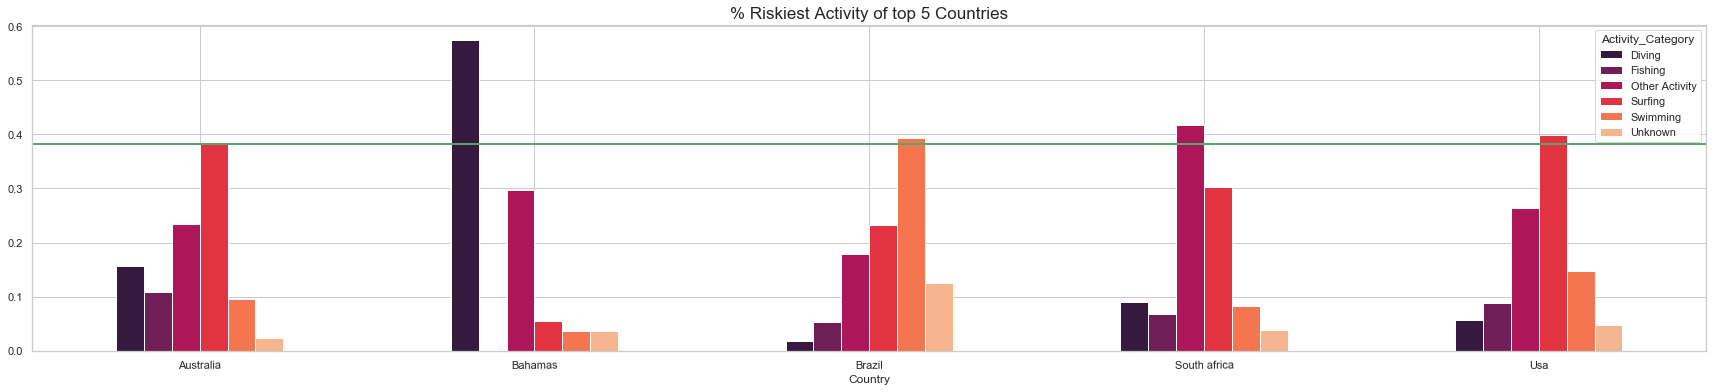

In [401]:
def top_5_activity_por (top_5_df):
    top_5_activity_por_fig = top_5_df.groupby('Country')['Activity_Category'].value_counts(normalize = True).unstack().fillna(0).plot(kind="bar", title="% Riskiest Activity of top 5 Countries")
    plt.axhline(top_5_df.groupby('Country')['Activity_Category'].value_counts(normalize = True).unstack().fillna(0).loc['Australia']['Surfing'].max(), c="g", linewidth=2, label="Max");
    plt.title("% Riskiest Activity of top 5 Countries", size=17)
    sns.set_palette("rocket")
    plt.xticks(rotation=0.5)
    top_5_activity_por_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/top_5_activity_por_fig.jpg", dpi=500)

top_5_activity_por (top_5_df)

In [97]:
top_5_df.groupby('Country')['TimeRange-ActCategory'].value_counts(normalize = True).unstack().fillna(0)

TimeRange-ActCategory,AfternoonDiving,AfternoonFishing,AfternoonOther Activity,AfternoonSurfing,AfternoonSwimming,AfternoonUnknown,EveningFishing,EveningOther Activity,EveningSurfing,EveningSwimming,MorningDiving,MorningFishing,MorningOther Activity,MorningSurfing,MorningSwimming,MorningUnknown
Country,,,,,,,,,,,,,,,,
Australia,0.092838,0.068966,0.119363,0.206897,0.063660,0.021220,0.005305,0.007958,0.037135,0.002653,0.063660,0.034483,0.106101,0.137931,0.029178,0.002653
Bahamas,0.388889,0.000000,0.277778,0.018519,0.018519,0.037037,0.000000,0.000000,0.000000,0.000000,0.185185,0.000000,0.018519,0.037037,0.018519,0.000000
Brazil,0.017857,0.053571,0.107143,0.178571,0.285714,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.053571,0.107143,0.017857
South africa,0.060606,0.045455,0.318182,0.189394,0.068182,0.037879,0.007576,0.000000,0.000000,0.000000,0.030303,0.015152,0.098485,0.113636,0.015152,0.000000
Usa,0.027027,0.048857,0.161123,0.205821,0.087318,0.036383,0.001040,0.005198,0.006237,0.002079,0.030146,0.037422,0.096674,0.186071,0.058212,0.010395


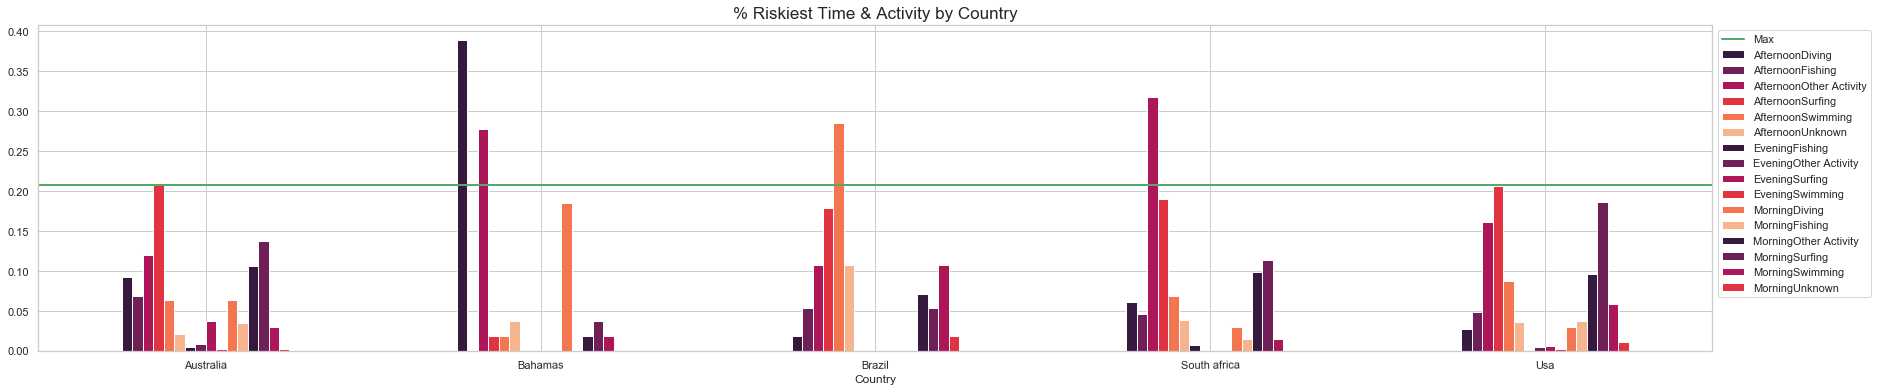

In [402]:
def top_5_time_range_act_por (top_5_df):
    top_5_time_range_act_por_fig =top_5_df.groupby('Country')['TimeRange-ActCategory'].value_counts(normalize = True).unstack().fillna(0).plot(kind="bar", title="% Riskiest Time & Activity by Country")
    plt.axhline(top_5_df.groupby('Country')['TimeRange-ActCategory'].value_counts(normalize = True).unstack().fillna(0).loc[['Australia']]['AfternoonSurfing'].max(), c="g", linewidth=2, label="Max");
    plt.title("% Riskiest Time & Activity by Country", size=17)
    sns.set_palette("rocket")
    plt.xticks(rotation=0.5)
    top_5_time_range_act_por_fig.legend(bbox_to_anchor=(1.0, 1.0))
    top_5_time_range_act_por_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/top_5_time_range_act_por_fig.jpg", dpi=500)

    
top_5_time_range_act_por (top_5_df)

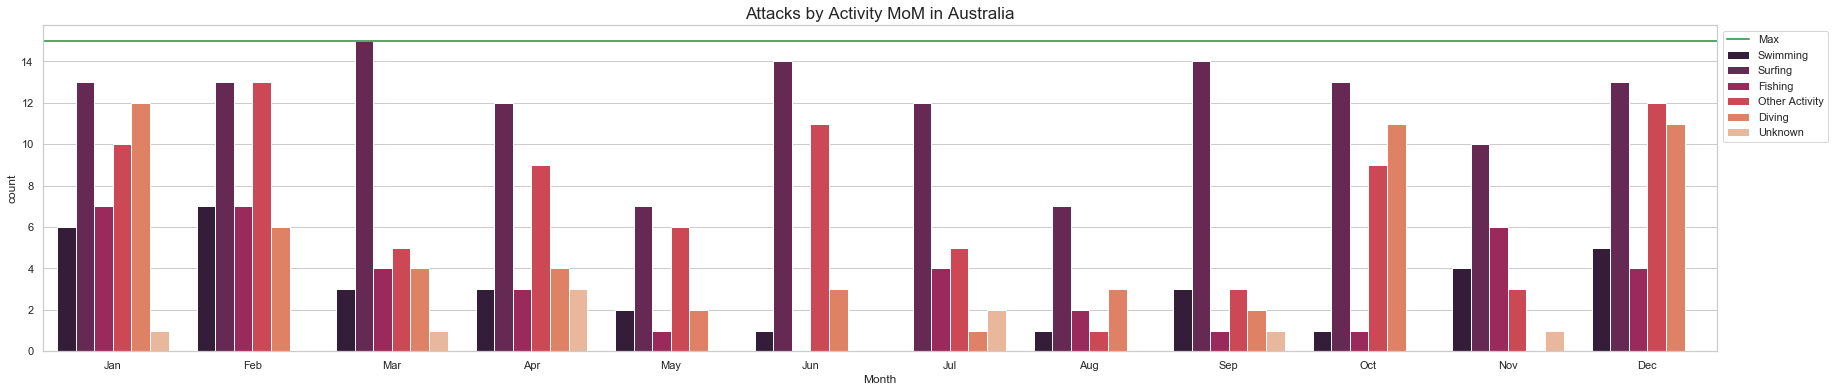

In [403]:
def australia_activities_mom (top_5_df):
    australia_activities_mom_fig =sns.countplot(x="Month", hue="Activity_Category", data=top_5_df[top_5_df['Country']=='Australia'], palette="rocket",
                 order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.axhline(top_5_df[top_5_df['Country']=='Australia'].groupby('Month')['Activity_Category'].value_counts().unstack().fillna(0).loc['Mar']['Surfing'].max(), c="g", linewidth=2, label="Max");
    plt.title("Attacks by Activity MoM in Australia", size=17)
    australia_activities_mom_fig.legend(bbox_to_anchor=(1.0, 1.0))
    australia_activities_mom_fig.figure.savefig("C:/Users/maria/Desktop/Project_1_Pandas_Mariano/images/australia_activities_mom_fig.jpg", dpi=500)

australia_activities_mom (top_5_df)

Conclusions:
    - Australia is the 2nd Country with 19% of the attacks registered during 2000's, USA is the first one with over 48%.
    - Surfing is the main cause of the attacks registered (38% of them) and surfing during the afternoon represets over 20% of the attacks in Australia.
    - Over 57% of the attacks occurs during the Afternoon in Australia.
    - There is no clear trend YoY during 2000's but ever since 2000's the registration of attacks recorrded increased drastically, this would be a good point to investigate the reason behind this spike.
    - We can confirm that most of the attacks are not fatal -> Only 24% of them are but over 33% are fatal in Australia during this period of time (which is more in comparison to the rest of the top 5 countries).
    - The riskiest month where attacks were registerd the most for Surfing activity is March.

In [412]:
sub_df2['Country'].value_counts(normalize = True)

Usa                  0.486842
Australia            0.190789
South africa         0.066802
Brazil               0.028340
Bahamas              0.027328
                       ...   
Puerto rico          0.000506
Maldives             0.000506
Gulf of aden         0.000506
Micronesia           0.000506
Trinidad & tobago    0.000506
Name: Country, Length: 94, dtype: float64

In [416]:
sub_df['Fatal'].value_counts(normalize = True).loc[['Y','N']]

Y    0.240847
N    0.744925
Name: Fatal, dtype: float64

In [419]:
top_5_df.groupby('Fatal')['Country'].value_counts(normalize = True).unstack().fillna(0).loc[['Y','N']]

Country,Australia,Bahamas,Brazil,South africa,Usa
Fatal,,,,,
Y,0.333333,0.011111,0.200000,0.244444,0.211111
N,0.228924,0.036337,0.022529,0.070494,0.641715


In [421]:
top_5_df.groupby('Country')['Time_Range'].value_counts(normalize = True).unstack().fillna(0)

Time_Range,Afternoon,Evening,Morning
Country,,,
Australia,0.572944,0.053050,0.374005
Bahamas,0.740741,0.000000,0.259259
Brazil,0.750000,0.000000,0.250000
South africa,0.719697,0.007576,0.272727
Usa,0.566528,0.014553,0.418919


In [425]:
top_5_df.groupby('Country')['Activity_Category'].value_counts(normalize = True).unstack().fillna(0)

Activity_Category,Diving,Fishing,Other Activity,Surfing,Swimming,Unknown
Country,,,,,,
Australia,0.156499,0.108753,0.233422,0.381963,0.095491,0.023873
Bahamas,0.574074,0.000000,0.296296,0.055556,0.037037,0.037037
Brazil,0.017857,0.053571,0.178571,0.232143,0.392857,0.125000
South africa,0.090909,0.068182,0.416667,0.303030,0.083333,0.037879
Usa,0.057173,0.087318,0.262994,0.398129,0.147609,0.046778
